<a href="https://colab.research.google.com/github/ShalilG/Stock-Market-Analysis/blob/main/MeanReversionTradingStrategyRatios.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 1.1 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


In [2]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [3]:
#Mean reversion trading strategy - Asset prices will generally revert to the mean 

In [104]:
#Load the data 
tick = 'MSFT'

#Show the data for Adj Close
df = yf.download(tick, start = '2021-10-4', end = '2022-10-5', interval = "1d")

df 

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-10-04 00:00:00-04:00,287.399994,287.750000,280.250000,283.109985,280.758636,31350700
2021-10-05 00:00:00-04:00,284.049988,290.399994,284.049988,288.760010,286.361694,24993000
2021-10-06 00:00:00-04:00,285.779999,293.630005,285.510010,293.109985,290.675537,28002600
2021-10-07 00:00:00-04:00,295.179993,296.640015,293.920013,294.850006,292.401154,20430500
2021-10-08 00:00:00-04:00,296.220001,296.640015,293.760010,294.850006,292.401154,17685700
...,...,...,...,...,...,...
2022-09-28 00:00:00-04:00,236.809998,242.330002,234.729996,241.070007,241.070007,29029700
2022-09-29 00:00:00-04:00,238.889999,239.949997,234.410004,237.500000,237.500000,27484200
2022-09-30 00:00:00-04:00,238.289993,240.539993,232.729996,232.899994,232.899994,35671100


In [105]:
#Function to calculate the simple moving average

def SMA(data, period = 200, column = 'Close'):
  return data[column].rolling(window=period).mean()

In [106]:
#Build and show the dataset

df['SMA'] = SMA(df, 21)
df['Simple_Returns'] = df.pct_change(1)['Close']
df['Log_Returns'] = np.log(1+df['Simple_Returns'])
df['Ratios'] = df['Close']/ df['SMA']

df

,Open,High,Low,Close,Adj Close,Volume,SMA,Simple_Returns,Log_Returns,Ratios
Date,,,,,,,,,,
2021-10-04 00:00:00-04:00,287.399994,287.750000,280.250000,283.109985,280.758636,31350700,NaN,NaN,NaN,NaN
2021-10-05 00:00:00-04:00,284.049988,290.399994,284.049988,288.760010,286.361694,24993000,NaN,0.019957,0.019760,NaN
2021-10-06 00:00:00-04:00,285.779999,293.630005,285.510010,293.109985,290.675537,28002600,NaN,0.015064,0.014952,NaN
2021-10-07 00:00:00-04:00,295.179993,296.640015,293.920013,294.850006,292.401154,20430500,NaN,0.005936,0.005919,NaN
2021-10-08 00:00:00-04:00,296.220001,296.640015,293.760010,294.850006,292.401154,17685700,NaN,0.000000,0.000000,NaN
...,...,...,...,...,...,...,...,...,...,...
2022-09-28 00:00:00-04:00,236.809998,242.330002,234.729996,241.070007,241.070007,29029700,250.283332,0.019712,0.019520,0.963188
2022-09-29 00:00:00-04:00,238.889999,239.949997,234.410004,237.500000,237.500000,27484200,249.070475,-0.014809,-0.014920,0.953545
2022-09-30 00:00:00-04:00,238.289993,240.539993,232.729996,232.899994,232.899994,35671100,247.709999,-0.019368,-0.019558,0.940212


In [107]:
#Statistics on the Ratio Columns 

df['Ratios'].describe()

count    233.000000
mean       0.989729
std        0.043285
min        0.909607
25%        0.952973
50%        0.986614
75%        1.022529
max        1.082146
Name: Ratios, dtype: float64

In [108]:
#Get and show the percentile values 
percentiles = [5, 20, 50, 80, 95]

#Remove the Nan values in Ratios column and store results in new variable called ratios

ratios = df['Ratios'].dropna()

#Get the values of the percentiles 

percentile_values = np.percentile(ratios, percentiles)

#Show the values of the percentiles 

percentile_values

array([0.92852315, 0.94468453, 0.98661423, 1.0324765 , 1.06676943])

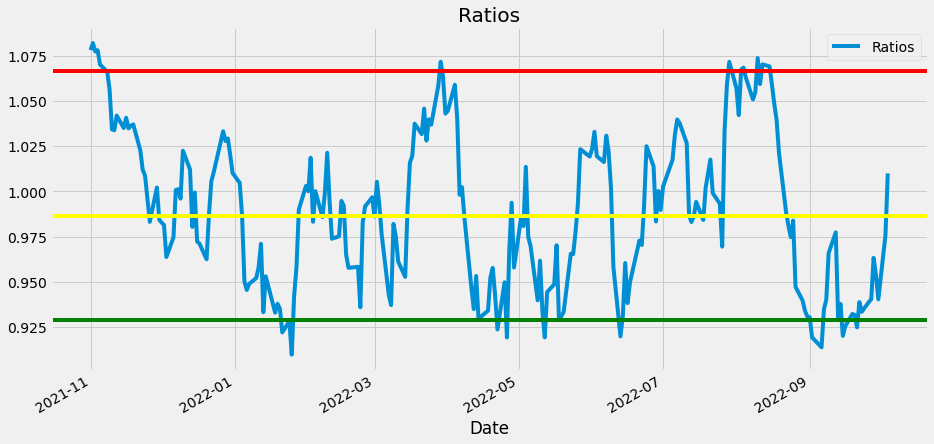

In [109]:
#Plot the ratios
plt.figure(figsize = (14,7))
plt.title('Ratios')
df['Ratios'].dropna().plot(legend=True)
plt.axhline(percentile_values[0], c = 'green', label = '15th Percentile')
plt.axhline(percentile_values[2], c = 'yellow', label = '50th Percentile')
plt.axhline(percentile_values[-1], c = 'red', label = '85th Percentile')

In [110]:
#Create Buy & Sell signals 

sell = percentile_values[-1] #85th percentile - sell
buy = percentile_values[0] #15th percentile - buy 

df['Positions'] = np.where(df.Ratios > sell, -1, np.nan)

#Put a 1 where the ratio is less than the percentile to buy and put the current value otherwise 
df['Positions'] = np.where(df.Ratios < buy, 1, df['Positions'])

#Use ffill to fill the missing values in the dataframe. ffill means forward fill

df['Positions'] = df['Positions'].ffill()

#Get the buy and sell signals 

df['Buy'] = np.where(df.Positions == 1, df['Close'], np.nan)
df['Sell'] = np.where(df.Positions == -1, df['Close'], np.nan)

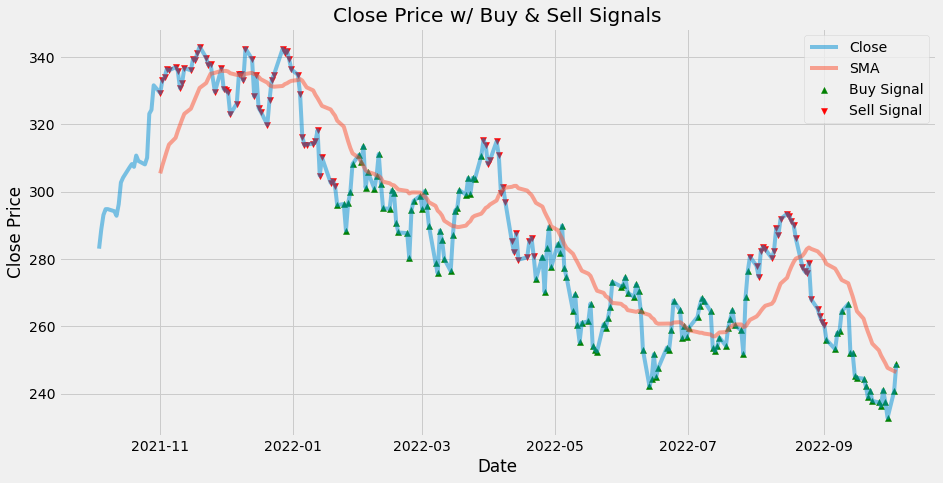

In [111]:
#Visualise the data with buy and sell signals 

plt.figure(figsize = (14,7))
plt.title('Close Price w/ Buy & Sell Signals')
plt.plot(df['Close'], alpha = 0.5, label = 'Close')
plt.plot(df['SMA'], alpha = 0.5, label = 'SMA')
plt.scatter(df.index, df['Buy'], color = 'green', label = 'Buy Signal', marker = '^', alpha = 1)
plt.scatter(df.index, df['Sell'], color = 'red', label = 'Sell Signal', marker = 'v', alpha = 1)
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

In [112]:
#Calculate returns for strategy 

df['Strategy_Returns'] = df.Positions.shift(1)*df.Log_Returns
df['Strategy_Returns']  

Date
2021-10-04 00:00:00-04:00         NaN
2021-10-05 00:00:00-04:00         NaN
2021-10-06 00:00:00-04:00         NaN
2021-10-07 00:00:00-04:00         NaN
2021-10-08 00:00:00-04:00         NaN
                               ...   
2022-09-28 00:00:00-04:00    0.019520
2022-09-29 00:00:00-04:00   -0.014920
2022-09-30 00:00:00-04:00   -0.019558
2022-10-03 00:00:00-04:00    0.033108
2022-10-04 00:00:00-04:00    0.033253
Name: Strategy_Returns, Length: 253, dtype: float64

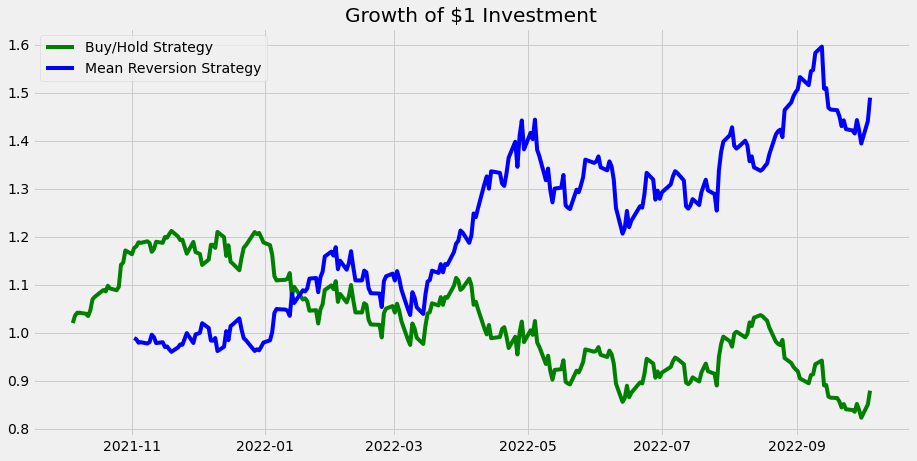

In [113]:
 #Plot the cumulative log returns & the cumulative Mean Reversion Strategy 
plt.figure(figsize=(14,7))
plt.title('Growth of $1 Investment')
plt.plot(np.exp(df['Log_Returns'].dropna()).cumprod(), c = 'green', label = 'Buy/Hold Strategy')
plt.plot(np.exp(df['Strategy_Returns'].dropna()).cumprod(), c = 'blue', label = 'Mean Reversion Strategy')
plt.legend()

In [114]:
#Print the returns for both strategies 

print('Buy & Hold Strategy Returns:', (np.exp(df['Log_Returns'].dropna()).cumprod()[-1]-1)*100,'%')
print('Mean Reversion Strategy Returns:', (np.exp(df['Strategy_Returns'].dropna()).cumprod()[-1]-1)*100,'%')

Buy & Hold Strategy Returns: -12.090700519179364 %
Mean Reversion Strategy Returns: 48.9643649543821 %
